In [171]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importation du jeu de données
valeur_manquante = ['?', ' ']
data = pd.read_csv('donnees.csv',na_values = valeur_manquante)
pd.set_option('display.max_columns',34)
data.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,IDENTIFIANTPLU,INTITULEPROTECTIONPLU,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,RAISONDEPLANTATION,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAITEMENTCHENILLES,TRAVAUXPRECONISESDIAG,TROTTOIR,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014.0,2019.0,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,Alnus,NaN,NaN,Arbre davenir normal,plus de 20 ans,Remplacement,NaN,ESP151,Arbre de voirie,Arbre jeune,Arbre jeune,NaN,Controle,non,NaN,NaN,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013.0,NaN,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,NaN,non,NaN,NaN,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,NaN,2014.0,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,Magnolia,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,NaN,Controle,oui,NaN,NaN,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014.0,2014.0,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,Sophora,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,Enormément de grosses branches cassées,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,Taille mise en sécurité,oui,NaN,NaN,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013.0,NaN,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,Fraxinus,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,NaN,oui,NaN,NaN,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


# 1. Exploration des données
## Objectif : 

- Comprendre au mieux possible nos données
- Développer une stratégie de modélisation 

## Analyse

Analyse de Forme :

- variable target : DEFAUT
- lignes et colonnes : (15375, 34)
- types de variables : 22 variables qualitatives, 12 variables quantitatives
- Analyse des valeurs manquantes : 7 colonnes ont plus de 70% de valeurs manquantes 

Analyse de Fond : 

- Visualisation de la variable target : 32% des arbres ont un défaut 
- Signification des variables : Les arbres entre 10 et 20 centimètres de diamètre étant très fréquenté, d'avenir normal, ayant plus de 20 ans étant dans des espaces ouverts, non positionné sur le trottoir, adulte et vigoureux sont les plus représentés dans ce jeu de données. 
- Relation Variables/Target : - Il semblerait qu'en proportion les arbres étant proche d'un trottoir ait plus de défaut. 
                              - Il semblerait qu'en proportion les arbres du secteur 2 ait plus de défaut
                              - Il semblerait qu'en proportion les arbres ayant réalisé un diagnostic en 2015 ait plus de défaut
                              - Il semblerait qu'en proportion les arbres vigoureux ait moins de défaut
                              
- Relation Variables/Variables :
    - Certaines variables sont très corrélées
- NaN : En supprimant les valeurs manquantes des colonnes que l'on utilise, on garderait pratiquement la même proportion d'arbre avec et sans défaut. 

## Analyse de la forme des données

In [89]:
df = data.copy()

In [65]:
df.shape

(15375, 34)

In [90]:
df.dtypes.value_counts()

object     22
int64       7
float64     5
dtype: int64

<AxesSubplot:>

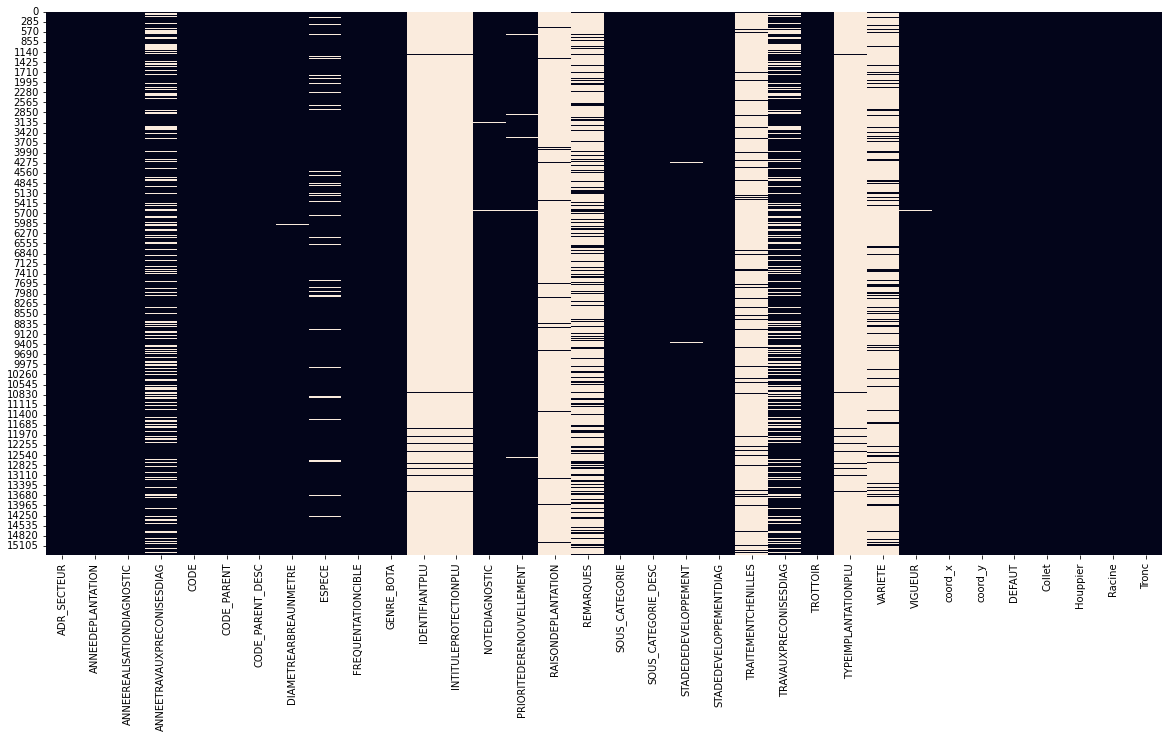

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [68]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

RAISONDEPLANTATION            0.985041
INTITULEPROTECTIONPLU         0.976520
IDENTIFIANTPLU                0.976520
TYPEIMPLANTATIONPLU           0.976520
TRAITEMENTCHENILLES           0.929236
VARIETE                       0.859317
REMARQUES                     0.726894
TRAVAUXPRECONISESDIAG         0.294309
ANNEETRAVAUXPRECONISESDIAG    0.293398
ESPECE                        0.066211
PRIORITEDERENOUVELLEMENT      0.008260
DIAMETREARBREAUNMETRE         0.004358
STADEDEDEVELOPPEMENT          0.003317
NOTEDIAGNOSTIC                0.002602
STADEDEVELOPPEMENTDIAG        0.000846
VIGUEUR                       0.000715
ANNEEREALISATIONDIAGNOSTIC    0.000520
FREQUENTATIONCIBLE            0.000065
Racine                        0.000000
coord_x                       0.000000
coord_y                       0.000000
Houppier                      0.000000
DEFAUT                        0.000000
Collet                        0.000000
ADR_SECTEUR                   0.000000
SOUS_CATEGORIE           

## Analyse du fond
### 1. Visualisation initiale - Elimination des colonnes inutiles

In [91]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.7]] # Selection des colonnes ayant moins de 70% de valeurs manquantes
df.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAVAUXPRECONISESDIAG,TROTTOIR,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014.0,2019.0,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,Alnus,Arbre davenir normal,plus de 20 ans,ESP151,Arbre de voirie,Arbre jeune,Arbre jeune,Controle,non,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013.0,NaN,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,Arbre davenir normal,plus de 20 ans,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,non,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,NaN,2014.0,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,Magnolia,Arbre davenir normal,plus de 20 ans,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,Controle,oui,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014.0,2014.0,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,Sophora,Arbre davenir normal,plus de 20 ans,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,Taille mise en sécurité,oui,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013.0,NaN,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,Fraxinus,Arbre davenir normal,plus de 20 ans,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,oui,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


In [92]:
df = df.drop(['STADEDEDEVELOPPEMENT','CODE','CODE_PARENT','CODE_PARENT_DESC','TRAVAUXPRECONISESDIAG','SOUS_CATEGORIE','ESPECE','GENRE_BOTA','coord_x','coord_y','Collet','Houppier','Racine','Tronc'], axis=1)

<AxesSubplot:>

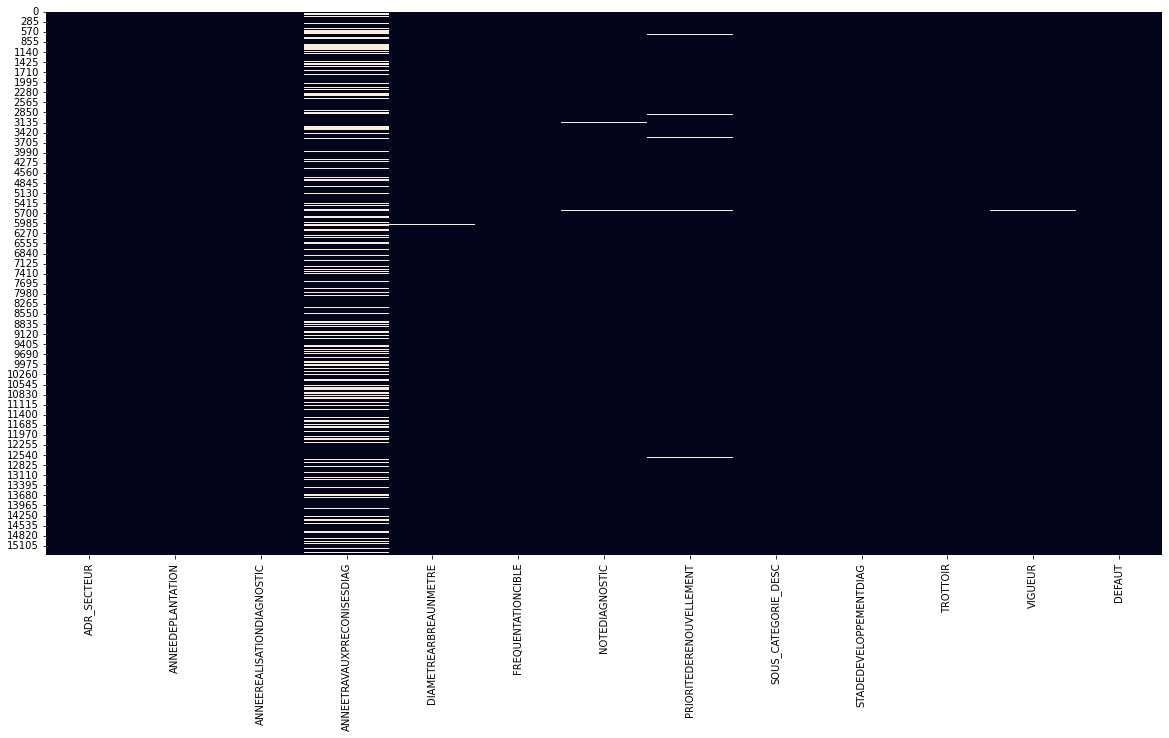

In [93]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

## Examen de la colonne target

In [28]:
df['DEFAUT'].value_counts()

0    10374
1     5001
Name: DEFAUT, dtype: int64

In [29]:
df['DEFAUT'].value_counts(normalize=True)

0    0.674732
1    0.325268
Name: DEFAUT, dtype: float64

## Variables Qualitatives

In [94]:
for colonnes in df.select_dtypes('object'):
    print(f'{colonnes :-<126}{df[colonnes].unique()}')

DIAMETREARBREAUNMETRE---------------------------------------------------------------------------------------------------------['10 à 20 cm' '30 à 40 cm' '40 à 50 cm' '20 à 30 cm' '0 à 10 cm'
 '110 à 120 cm' '100 à 110 cm' '70 à 80 cm' '50 à 60 cm' '60 à 70 cm'
 '80 à 90 cm' '90 à 100 cm' nan '130 à 140 cm' '120 à 130 cm'
 '160 à 170 cm' '140 à 150 cm' '150 à 160 cm' '180 à 190 cm'
 '170 à 180 cm']
FREQUENTATIONCIBLE------------------------------------------------------------------------------------------------------------['passages fréquents ou arrêts' 'passages fréquents et arrêts fréquents'
 'quelques passages' nan]
NOTEDIAGNOSTIC----------------------------------------------------------------------------------------------------------------['Arbre davenir normal' 'Arbre à abattre dans les 5 ans'
 'Arbre à abattre dans les 10 ans' 'Arbre davenir incertain'
 'Arbre à abattre immédiatement' nan]
PRIORITEDERENOUVELLEMENT--------------------------------------------------------------------

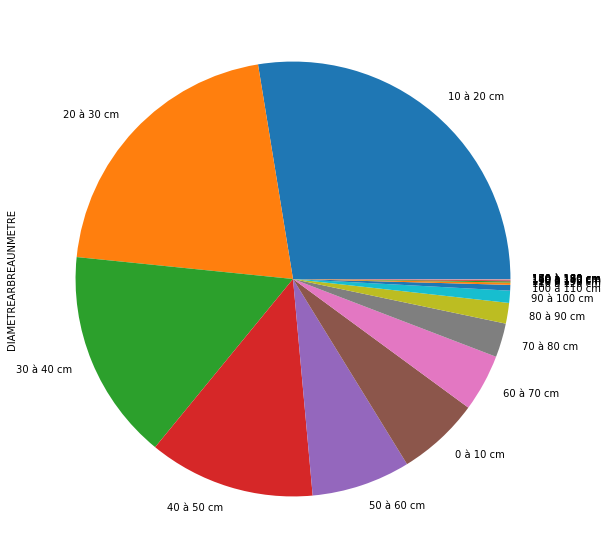

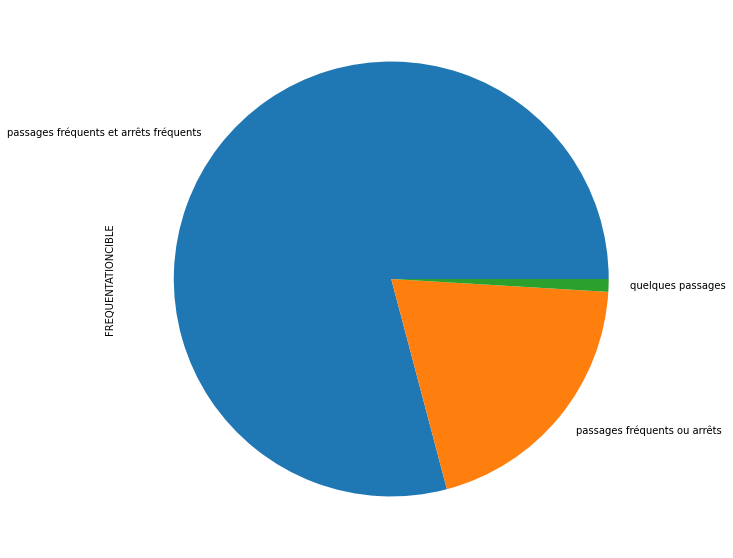

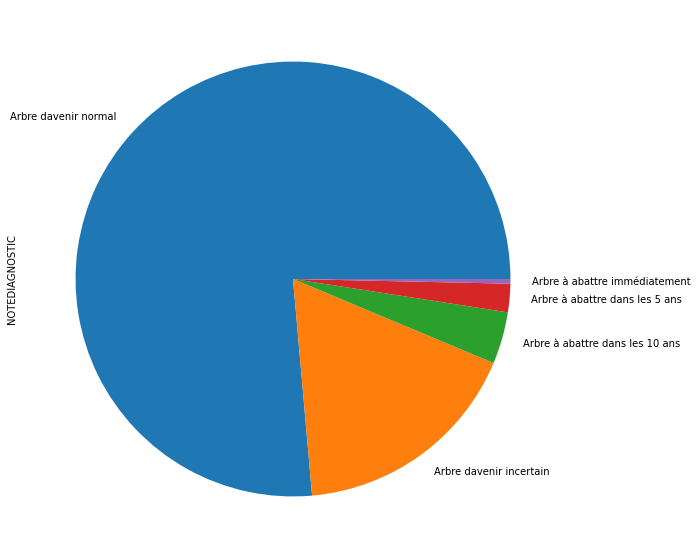

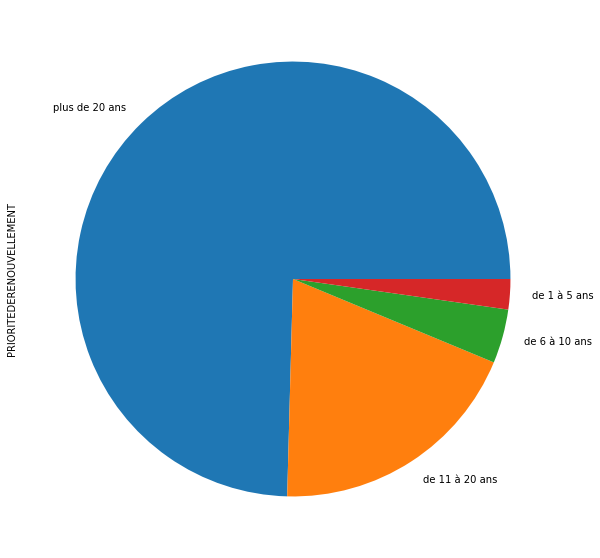

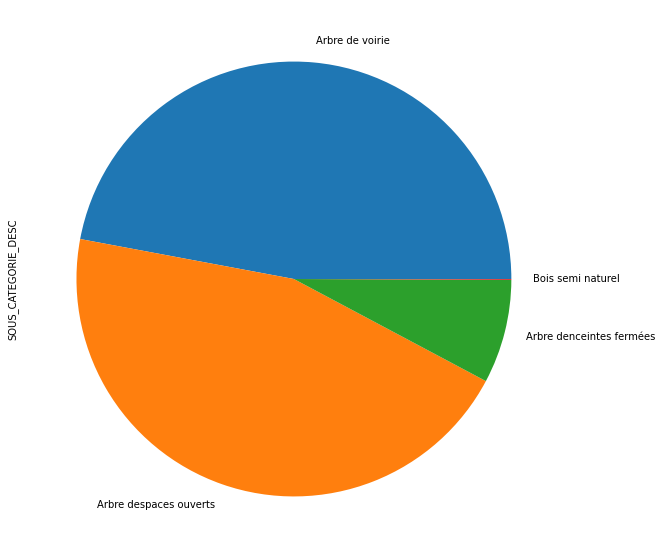

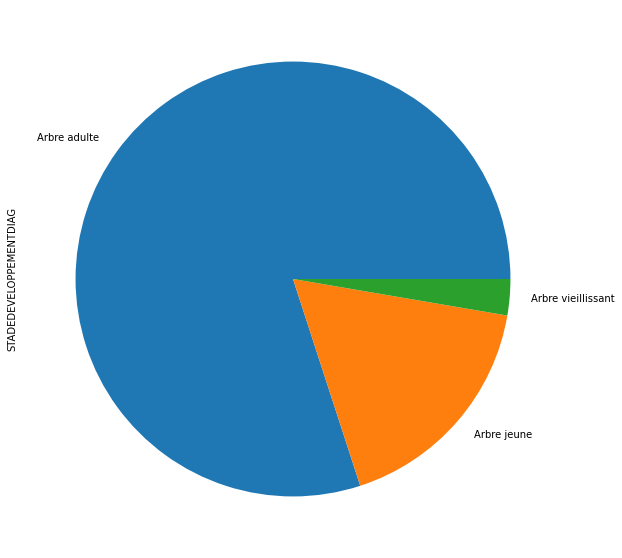

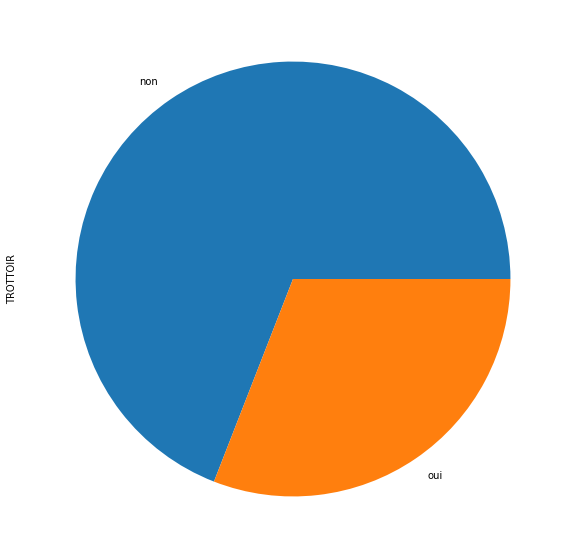

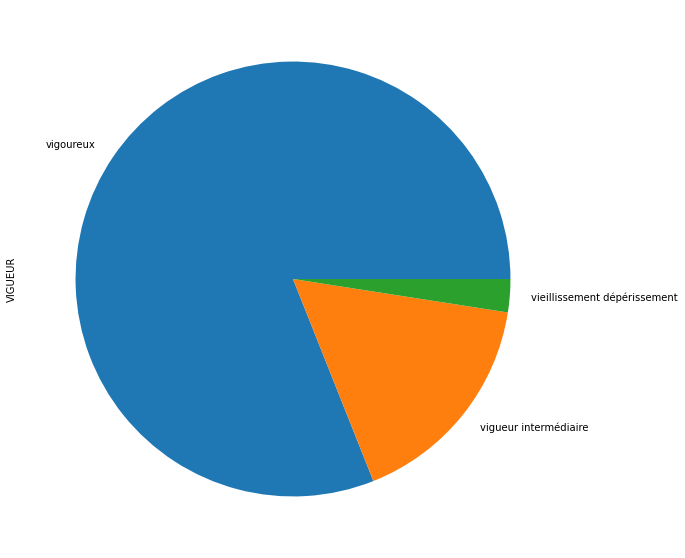

In [95]:
for colonnes in df.select_dtypes('object'):
    plt.figure(figsize=(10,10))
    df[colonnes].value_counts().plot.pie()

## Relation target/variable
### Création de sous-ensemble 

In [100]:
arbre_sans_defaut = df[df['DEFAUT'] == 0]

In [102]:
arbre_ayant_un_defaut = df[df['DEFAUT'] == 1]

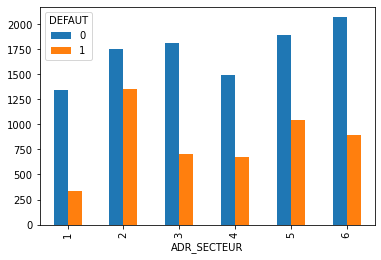

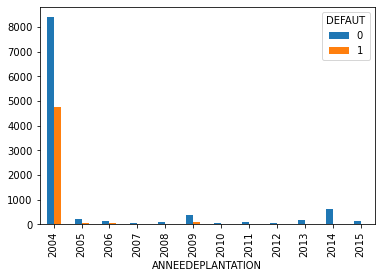

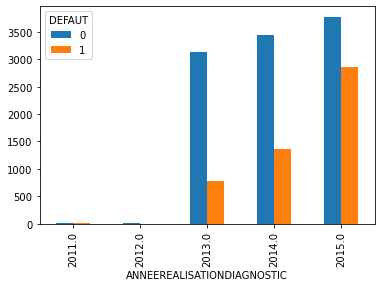

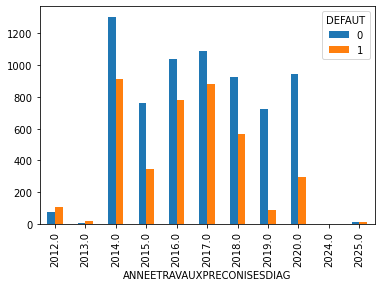

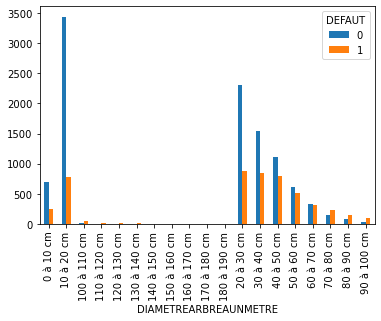

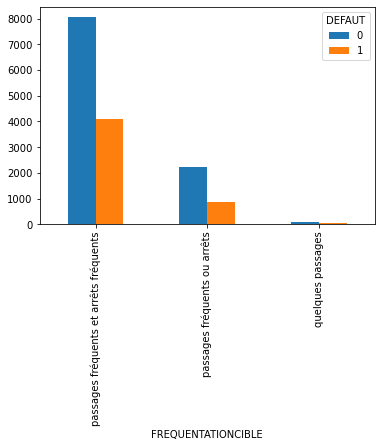

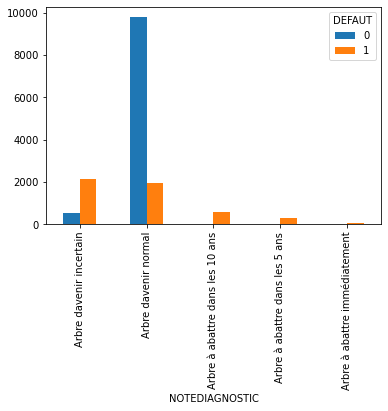

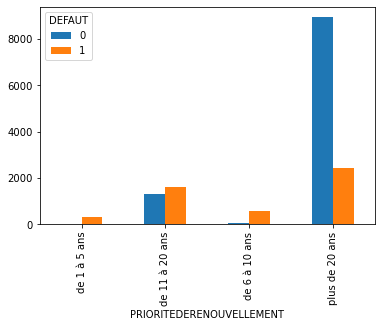

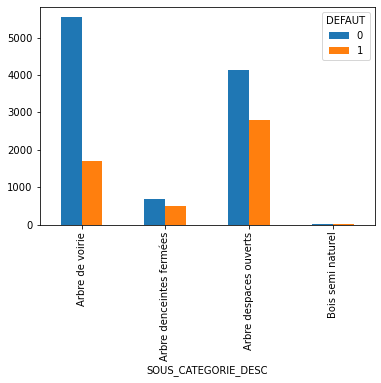

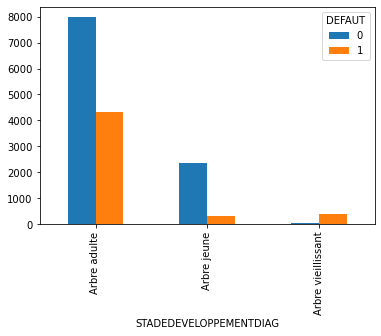

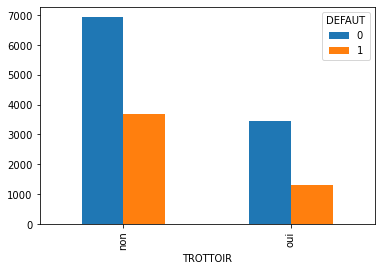

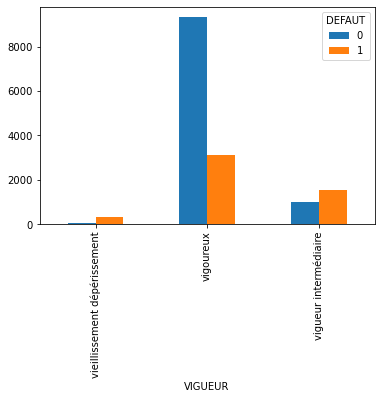

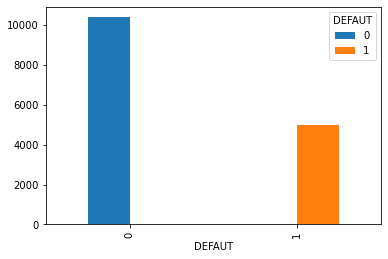

In [109]:
for colonnes in df.columns:
    pd.crosstab(df[colonnes],df.DEFAUT).plot(kind='bar')

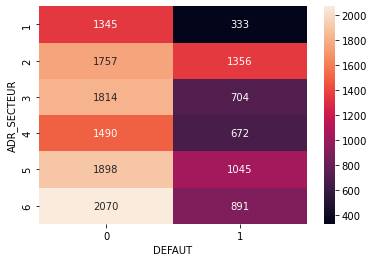

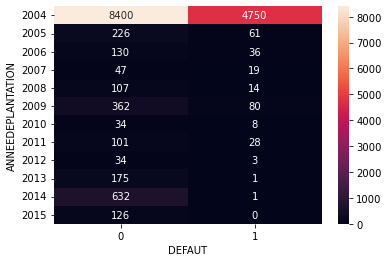

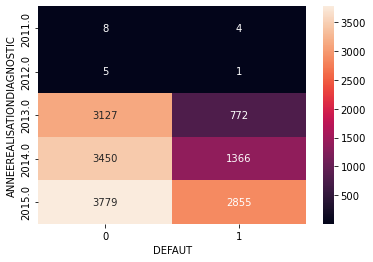

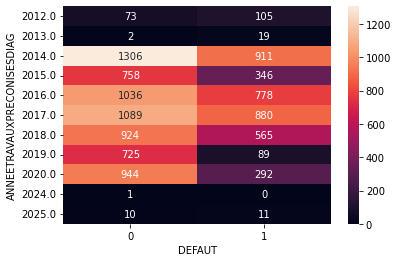

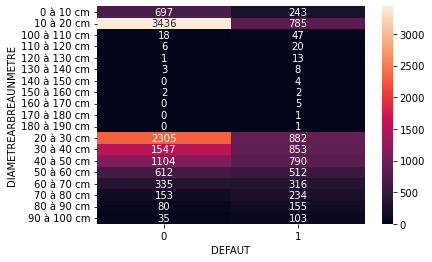

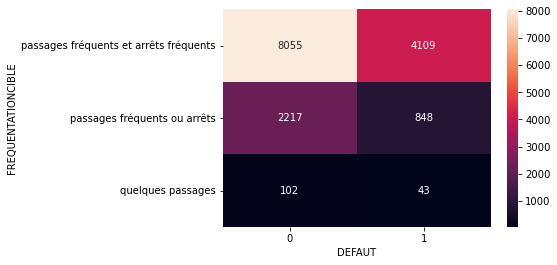

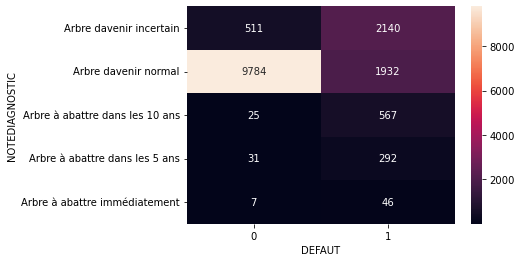

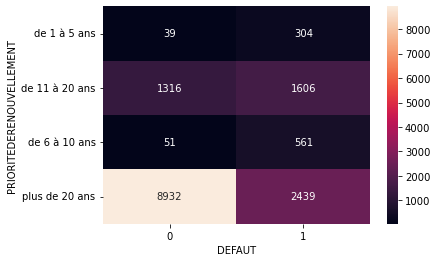

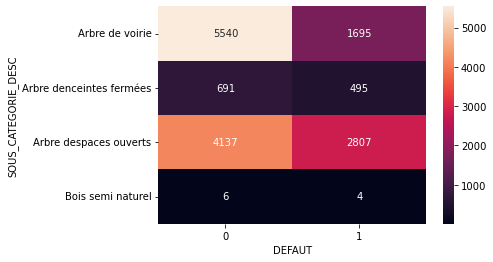

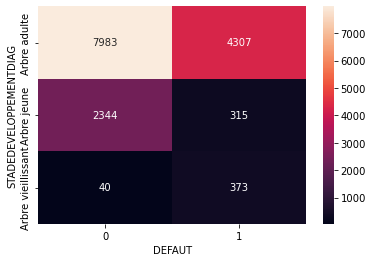

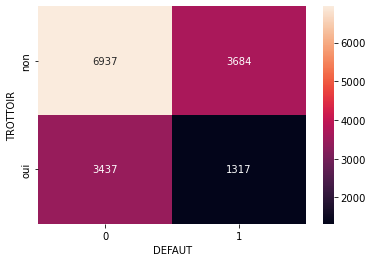

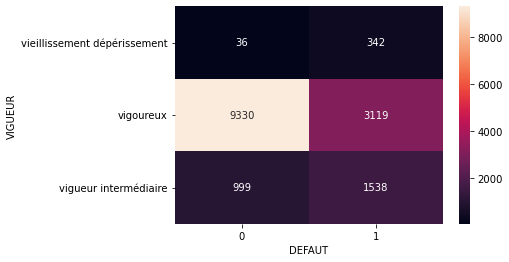

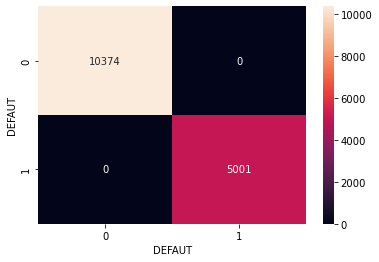

In [112]:
for colonnes in df.columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df[colonnes],df.DEFAUT),annot = True, fmt='d')

## Analyse un peu plus avancé

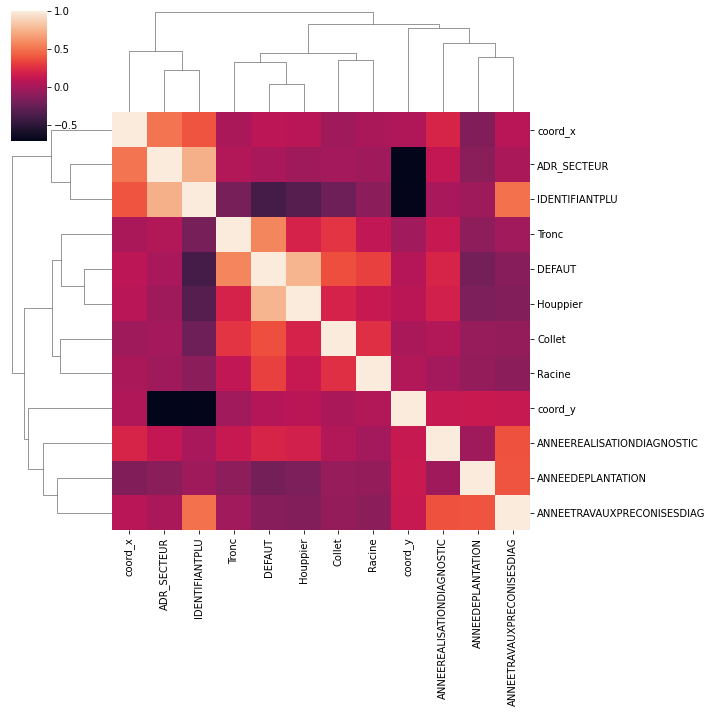

In [120]:
sns.clustermap(data.corr())

In [128]:
df = df.dropna()
df.dropna().count()

ADR_SECTEUR                   10694
ANNEEDEPLANTATION             10694
ANNEEREALISATIONDIAGNOSTIC    10694
ANNEETRAVAUXPRECONISESDIAG    10694
DIAMETREARBREAUNMETRE         10694
FREQUENTATIONCIBLE            10694
NOTEDIAGNOSTIC                10694
PRIORITEDERENOUVELLEMENT      10694
SOUS_CATEGORIE_DESC           10694
STADEDEVELOPPEMENTDIAG        10694
TROTTOIR                      10694
VIGUEUR                       10694
DEFAUT                        10694
dtype: int64

In [132]:
df['DEFAUT'].value_counts(normalize=True)

0    0.637367
1    0.362633
Name: DEFAUT, dtype: float64

## Test d'hypothèse, lien entre DEFAUT et les autres variables

In [150]:
from scipy.stats import chi2_contingency as chi2_contingency
for colonnes in data.select_dtypes('object'):
    matrice = data[[colonnes, 'DEFAUT']].pivot_table(index=colonnes, columns='DEFAUT', aggfunc=len).fillna(0).copy().astype(int)
    khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice)
    if pval >= 0.05: print("Il n'y a pas de lien significatif entre",colonnes,"et DEFAUT, la p valeur est de :",pval)
    else: print("Il y a un lien significatif entre",colonnes,"et DEFAUT, la p valeur est de :",pval)
    

Il n'y a pas de lien significatif entre CODE et DEFAUT, la p valeur est de : 0.49620826660724515
Il y a un lien significatif entre CODE_PARENT et DEFAUT, la p valeur est de : 0.0
Il y a un lien significatif entre CODE_PARENT_DESC et DEFAUT, la p valeur est de : 0.0
Il y a un lien significatif entre DIAMETREARBREAUNMETRE et DEFAUT, la p valeur est de : 1.7069742361350022e-236
Il y a un lien significatif entre ESPECE et DEFAUT, la p valeur est de : 1.0924444175853042e-147
Il y a un lien significatif entre FREQUENTATIONCIBLE et DEFAUT, la p valeur est de : 6.749700108753922e-10
Il y a un lien significatif entre GENRE_BOTA et DEFAUT, la p valeur est de : 3.590418274678894e-166
Il y a un lien significatif entre INTITULEPROTECTIONPLU et DEFAUT, la p valeur est de : 3.735710992523166e-08
Il y a un lien significatif entre NOTEDIAGNOSTIC et DEFAUT, la p valeur est de : 0.0
Il y a un lien significatif entre PRIORITEDERENOUVELLEMENT et DEFAUT, la p valeur est de : 0.0
Il n'y a pas de lien signifi

## Pre-processing

In [177]:
df = data.copy()

In [178]:
df.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,CODE,CODE_PARENT,CODE_PARENT_DESC,DIAMETREARBREAUNMETRE,ESPECE,FREQUENTATIONCIBLE,GENRE_BOTA,IDENTIFIANTPLU,INTITULEPROTECTIONPLU,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,RAISONDEPLANTATION,REMARQUES,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,STADEDEDEVELOPPEMENT,STADEDEVELOPPEMENTDIAG,TRAITEMENTCHENILLES,TRAVAUXPRECONISESDIAG,TROTTOIR,TYPEIMPLANTATIONPLU,VARIETE,VIGUEUR,coord_x,coord_y,DEFAUT,Collet,Houppier,Racine,Tronc
0,5,2014,2014.0,2019.0,ESP33155,ESP385,R D Fontanelle ang Essen JO,10 à 20 cm,cordata,passages fréquents ou arrêts,Alnus,NaN,NaN,Arbre davenir normal,plus de 20 ans,Remplacement,NaN,ESP151,Arbre de voirie,Arbre jeune,Arbre jeune,NaN,Controle,non,NaN,NaN,vigoureux,1.915371e+06,4.222837e+06,0,0,0,0,0
1,3,2004,2013.0,NaN,ESP2079,ESP116,Crs Libération Beauvert Alliés,30 à 40 cm,acerifolia,passages fréquents et arrêts fréquents,Platanus,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,NaN,non,NaN,NaN,vigoureux,1.913250e+06,4.222531e+06,0,0,0,0,0
2,3,2004,NaN,2014.0,ESP26205,ESP635,Pl R Frappat ang Eaux Claires,10 à 20 cm,grandiflora,passages fréquents ou arrêts,Magnolia,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP174,Arbre despaces ouverts,Arbre adulte,Arbre adulte,NaN,Controle,oui,NaN,NaN,vigoureux,1.913087e+06,4.223524e+06,0,0,0,0,0
3,2,2004,2014.0,2014.0,ESP7496,ESP109,R François Raoult,40 à 50 cm,japonica,passages fréquents et arrêts fréquents,Sophora,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,Enormément de grosses branches cassées,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,Taille mise en sécurité,oui,NaN,NaN,vigoureux,1.914187e+06,4.224275e+06,1,0,1,1,0
4,1,2004,2013.0,NaN,ESP2547,ESP194,Terminus Tram Esclangon,20 à 30 cm,americana,passages fréquents et arrêts fréquents,Fraxinus,NaN,NaN,Arbre davenir normal,plus de 20 ans,NaN,NaN,ESP151,Arbre de voirie,Arbre adulte,Arbre adulte,NaN,NaN,oui,NaN,NaN,vigoureux,1.912975e+06,4.225210e+06,0,0,0,0,0


In [179]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.7]]
df = df.drop(['STADEDEDEVELOPPEMENT','CODE','CODE_PARENT','CODE_PARENT_DESC','TRAVAUXPRECONISESDIAG','SOUS_CATEGORIE','ESPECE','GENRE_BOTA','coord_x','coord_y','Collet','Houppier','Racine','Tronc'], axis=1)

In [180]:
df.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,DIAMETREARBREAUNMETRE,FREQUENTATIONCIBLE,NOTEDIAGNOSTIC,PRIORITEDERENOUVELLEMENT,SOUS_CATEGORIE_DESC,STADEDEVELOPPEMENTDIAG,TROTTOIR,VIGUEUR,DEFAUT
0,5,2014,2014.0,2019.0,10 à 20 cm,passages fréquents ou arrêts,Arbre davenir normal,plus de 20 ans,Arbre de voirie,Arbre jeune,non,vigoureux,0
1,3,2004,2013.0,NaN,30 à 40 cm,passages fréquents et arrêts fréquents,Arbre davenir normal,plus de 20 ans,Arbre de voirie,Arbre adulte,non,vigoureux,0
2,3,2004,NaN,2014.0,10 à 20 cm,passages fréquents ou arrêts,Arbre davenir normal,plus de 20 ans,Arbre despaces ouverts,Arbre adulte,oui,vigoureux,0
3,2,2004,2014.0,2014.0,40 à 50 cm,passages fréquents et arrêts fréquents,Arbre davenir normal,plus de 20 ans,Arbre de voirie,Arbre adulte,oui,vigoureux,1
4,1,2004,2013.0,NaN,20 à 30 cm,passages fréquents et arrêts fréquents,Arbre davenir normal,plus de 20 ans,Arbre de voirie,Arbre adulte,oui,vigoureux,0


In [237]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

def encodage(df):
    for colonnes in df.select_dtypes('object').columns:
        jobs_encoder.fit(df[colonnes].astype(str))
        transformed = jobs_encoder.transform(df[colonnes].astype(str))
        ohe_df = pd.DataFrame(transformed)
        df = pd.concat([df, ohe_df], axis=1).drop([colonnes], axis=1)

    return df

def encodage_2(df):
    for colonnes in df.select_dtypes('object').columns: 
        dummy = pd.get_dummies (df[colonnes])
        df = pd.concat( [df, dummy ], axis = 1)
        del df[colonnes]
    return df

In [232]:
def imputation(df):
    return df.dropna(axis=0)

In [238]:
def preprocessing(df):
    df = encodage_2(df)
    df = imputation(df)
    X = df.drop('DEFAUT',axis = 1)
    y = df['DEFAUT']
    print(y.value_counts())
    return X,y 

In [239]:
X, y = preprocessing(df)

0    6865
1    3993
Name: DEFAUT, dtype: int64


In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [241]:
pd.set_option('display.max_columns',55)
X_train.head()

,ADR_SECTEUR,ANNEEDEPLANTATION,ANNEEREALISATIONDIAGNOSTIC,ANNEETRAVAUXPRECONISESDIAG,0 à 10 cm,10 à 20 cm,100 à 110 cm,110 à 120 cm,120 à 130 cm,130 à 140 cm,140 à 150 cm,150 à 160 cm,160 à 170 cm,170 à 180 cm,180 à 190 cm,20 à 30 cm,30 à 40 cm,40 à 50 cm,50 à 60 cm,60 à 70 cm,70 à 80 cm,80 à 90 cm,90 à 100 cm,passages fréquents et arrêts fréquents,passages fréquents ou arrêts,quelques passages,Arbre davenir incertain,Arbre davenir normal,Arbre à abattre dans les 10 ans,Arbre à abattre dans les 5 ans,Arbre à abattre immédiatement,de 1 à 5 ans,de 11 à 20 ans,de 6 à 10 ans,plus de 20 ans,Arbre de voirie,Arbre denceintes fermées,Arbre despaces ouverts,Bois semi naturel,Arbre adulte,Arbre jeune,Arbre vieillissant,non,oui,vieillissement dépérissement,vigoureux,vigueur intermédiaire
11698,1,2004,2013.0,2020.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
14031,5,2004,2015.0,2018.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
303,3,2004,2015.0,2016.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
5301,3,2014,2014.0,2020.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
14323,1,2004,2014.0,2014.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0


## Modélisation

In [329]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [340]:
preprocessor = make_pipeline(PolynomialFeatures(2,include_bias=False), SelectKBest(f_classif,k=10))

RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(),SVC(random_state = 0))
KNN = make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())

list_of_models = {'RandomForest':RandomForest,
                  'AdaBoost':AdaBoost,
                  'SVM':SVM,
                  'KNN':KNN}


In [346]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


RandomForest
[[1842  252]
 [ 232  932]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2094
           1       0.79      0.80      0.79      1164

    accuracy                           0.85      3258
   macro avg       0.84      0.84      0.84      3258
weighted avg       0.85      0.85      0.85      3258

AdaBoost
[[1898  196]
 [ 314  850]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2094
           1       0.81      0.73      0.77      1164

    accuracy                           0.84      3258
   macro avg       0.84      0.82      0.83      3258
weighted avg       0.84      0.84      0.84      3258

SVM
[[1959  135]
 [ 403  761]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2094
           1       0.85      0.65      0.74      1164

    accuracy                           0.83      3258
   macro avg       0.

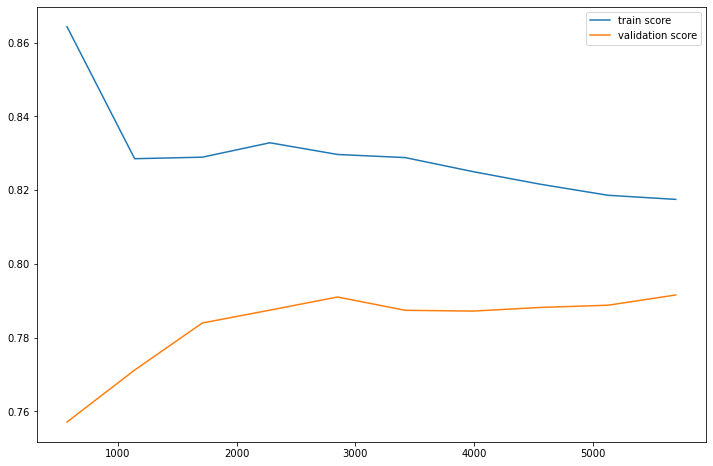

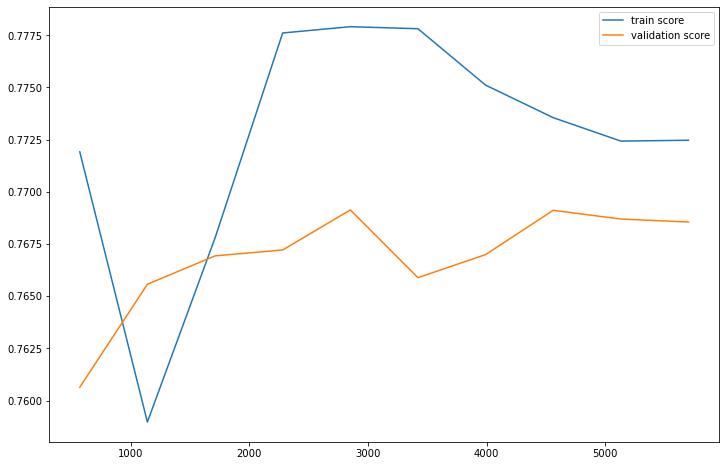

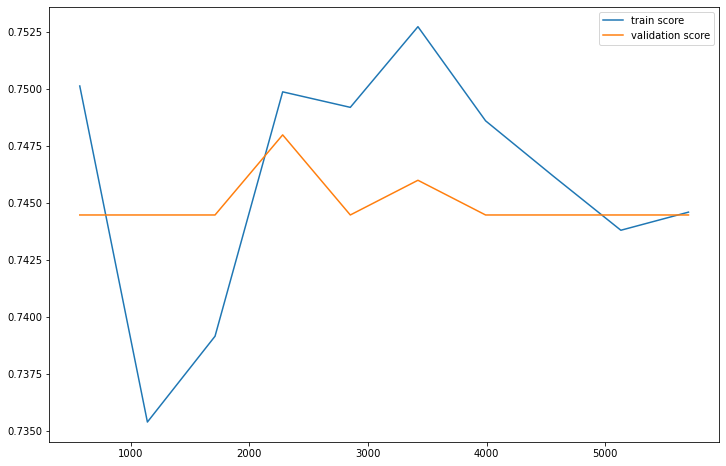

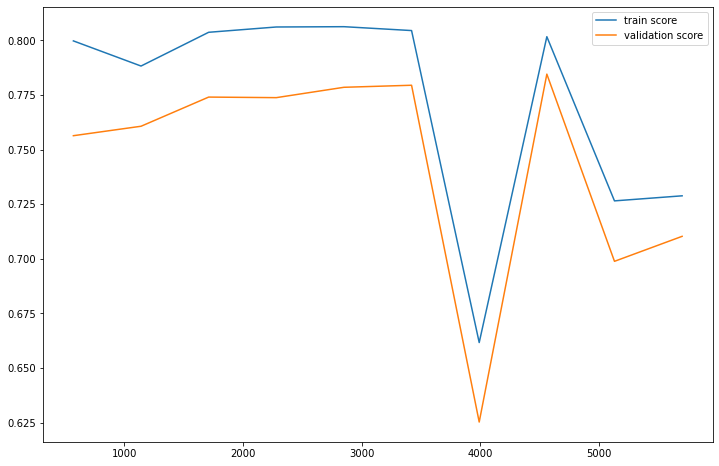

In [349]:
for name,model in list_of_models.items():
    print(name)
    evaluation(model)

In [243]:
model = DecisionTreeClassifier(random_state=0)

In [244]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [348]:
def evaluation(model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    N,train_score,val_score = learning_curve(model, X_train,y_train,scoring='f1', cv = 4,train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()

[[1876  218]
 [ 276  888]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2094
           1       0.80      0.76      0.78      1164

    accuracy                           0.85      3258
   macro avg       0.84      0.83      0.83      3258
weighted avg       0.85      0.85      0.85      3258



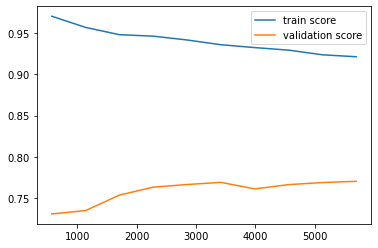

In [247]:
evaluation(model)

<AxesSubplot:>

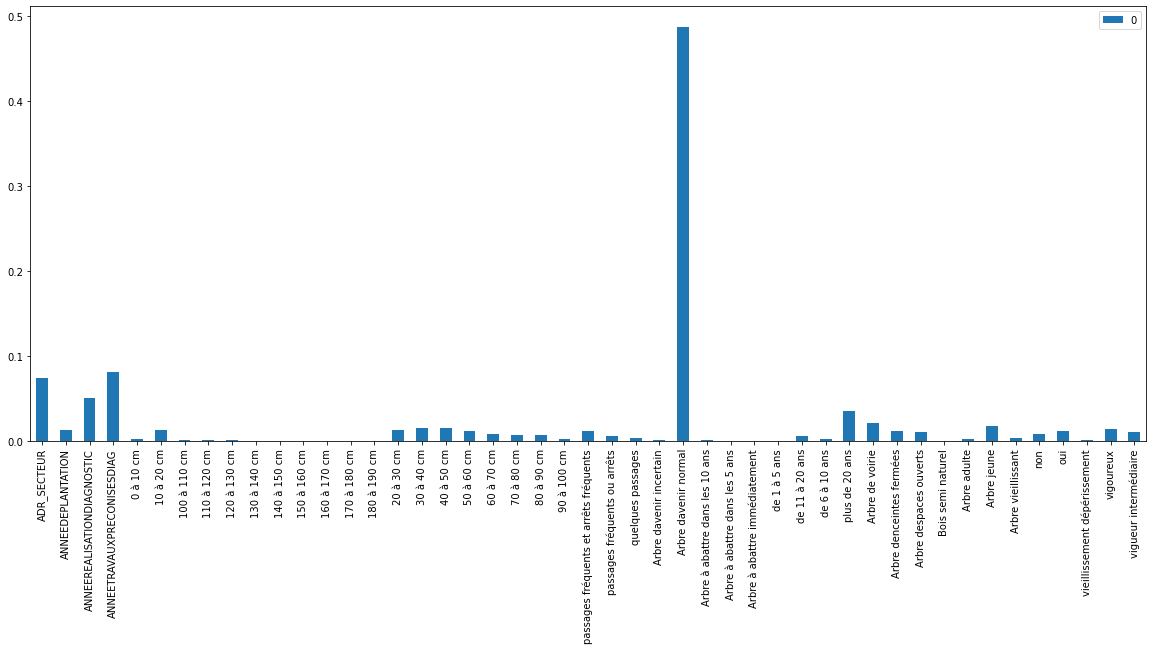

In [248]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(20,8))

In [310]:
#Selectionner les variables pertinentes au vu du graphique 
T = pd.DataFrame(model.feature_importances_ , index=X_train.columns)

In [308]:
nouvelle_variable = T[T[0] > 0.01].index

## Améliorer le modèle

In [319]:
X_train= X_train[nouvelle_variable]
X_test = X_test[nouvelle_variable]

[[1884  210]
 [ 262  902]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2094
           1       0.81      0.77      0.79      1164

    accuracy                           0.86      3258
   macro avg       0.84      0.84      0.84      3258
weighted avg       0.85      0.86      0.85      3258



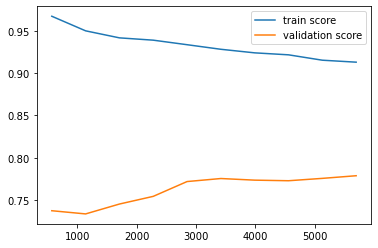

In [320]:
evaluation(model)

### Optimisation

In [371]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
SVM

In [374]:
hyper_params = {'svc__gamma':[1e-3,1e-4],
                'svc__C':[0,1,2,3,4,10,100,1000],
                'pipeline__polynomialfeatures__degree':[1,2,3,4],
               'pipeline__selectkbest__k':range(1,100)}

In [375]:
grid = RandomizedSearchCV(SVM,hyper_params,scoring='recall', cv = 4,n_iter=40)
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('polynomialfeatures',
                                                               PolynomialFeatures(include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest())])),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC(random_state=0))]),
                   n_iter=40,
                   param_distributions={'pipeline__polynomialfeatures__degree': [1,
                                                                                 2,
                                                                                 3,
                                                                                 4],
                                        'pipeline__selectkbest__k': range(1, 100),
                                        'svc__C': [0, 1, 2, 3, 4, 10, 100,
                                                   1000],
                                        'svc__gamma': [0.001, 0.0001]},
                   scoring='recall')

In [376]:
print(grid.best_params_)

{'svc__gamma': 0.001, 'svc__C': 100, 'pipeline__selectkbest__k': 28, 'pipeline__polynomialfeatures__degree': 2}


In [377]:
y_pred = grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2094
           1       0.85      0.65      0.74      1164

    accuracy                           0.83      3258
   macro avg       0.84      0.79      0.81      3258
weighted avg       0.84      0.83      0.83      3258



[[1959  135]
 [ 403  761]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2094
           1       0.85      0.65      0.74      1164

    accuracy                           0.83      3258
   macro avg       0.84      0.79      0.81      3258
weighted avg       0.84      0.83      0.83      3258



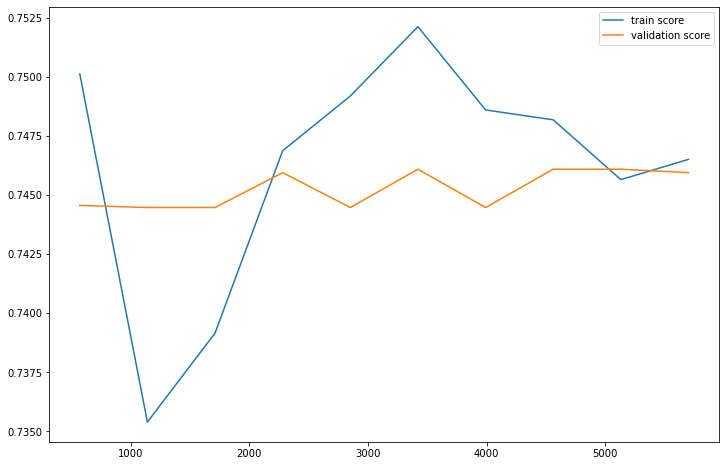

In [378]:
evaluation(grid.best_estimator_)

In [379]:
from sklearn.metrics import precision_recall_curve

In [381]:
precision, recall, threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

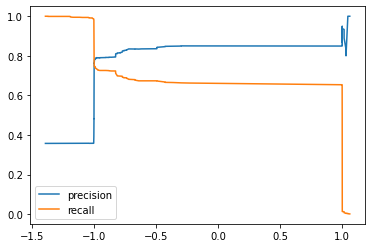

In [395]:
plt.plot(threshold,precision[:-1],label='precision')
plt.plot(threshold,recall[:-1],label='recall')
plt.legend()

In [388]:
def model_final(model,X,threshold):
    return model.decision_function(X) > threshold

In [403]:
y_pred = model_final(grid.best_estimator_, X_test,threshold = -1)

In [404]:
f1_score(y_test,y_pred)

0.7227575982209044

In [405]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.8376288659793815